Car 0 arrives at the parking lot at 0.00
Car 0 parked after waiting for 0.00 time units
Car 1 arrives at the parking lot at 0.08
Car 1 parked after waiting for 0.00 time units
Car 0 leaves the parking lot at 1.14
Car 2 arrives at the parking lot at 3.43
Car 2 parked after waiting for 0.00 time units
Car 1 leaves the parking lot at 3.46
Car 3 arrives at the parking lot at 4.59
Car 3 parked after waiting for 0.00 time units
Car 4 arrives at the parking lot at 4.96
Car 4 parked after waiting for 0.00 time units
Car 4 leaves the parking lot at 6.09
Car 3 leaves the parking lot at 7.63
Car 2 leaves the parking lot at 7.66
Car 5 arrives at the parking lot at 9.35
Car 5 parked after waiting for 0.00 time units
Car 5 leaves the parking lot at 12.43
Car 6 arrives at the parking lot at 17.12
Car 6 parked after waiting for 0.00 time units
Car 7 arrives at the parking lot at 18.16
Car 7 parked after waiting for 0.00 time units
Car 6 leaves the parking lot at 18.50
Car 8 arrives at the parking lot 

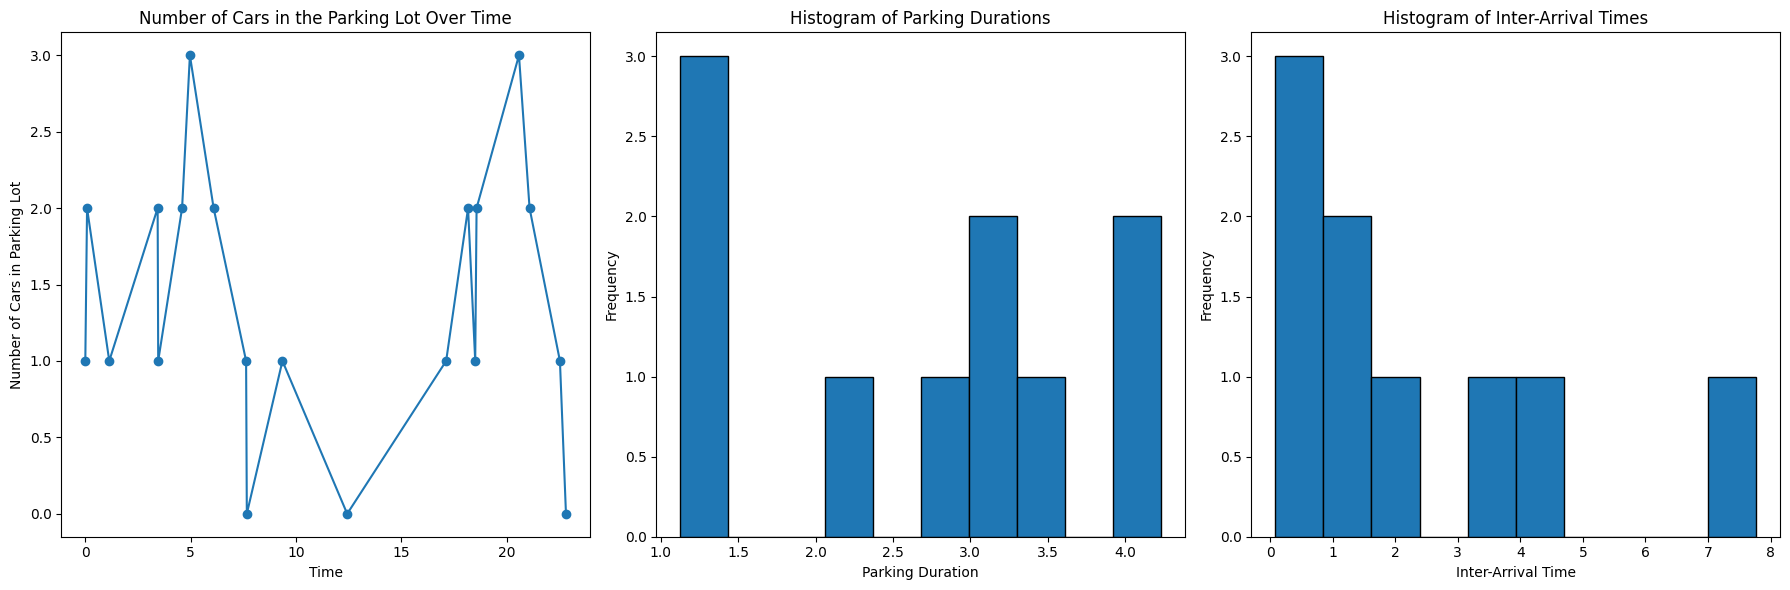

In [3]:
import simpy
import random
import matplotlib.pyplot as plt

# Collect data for plotting
arrival_times = []
departure_times = []
parking_times = []
inter_arrival_times = []
previous_arrival_time = None

def car(env, name, parking_lot):
    global previous_arrival_time
    
    arrival_time = env.now
    arrival_times.append(arrival_time)
    
    if previous_arrival_time is not None:
        inter_arrival_time = arrival_time - previous_arrival_time
        inter_arrival_times.append(inter_arrival_time)
    
    previous_arrival_time = arrival_time
    
    print(f'{name} arrives at the parking lot at {arrival_time:.2f}')
    
    with parking_lot.request() as request:
        yield request
        wait_time = env.now - arrival_time
        print(f'{name} parked after waiting for {wait_time:.2f} time units')
        
        # Simulate the duration the car stays in the parking lot
        parking_duration = random.uniform(1, 5)  # Random duration between 1 and 5 time units
        yield env.timeout(parking_duration)
        departure_time = env.now
        departure_times.append(departure_time)
        parking_times.append(parking_duration)
        print(f'{name} leaves the parking lot at {departure_time:.2f}')

# Set up the simulation environment
env = simpy.Environment()
parking_lot = simpy.Resource(env, capacity=5)  # Parking lot with 5 spots

def arrival_process(env, parking_lot):
    global previous_arrival_time
    # Schedule car arrivals
    for i in range(10):
        env.process(car(env, f'Car {i}', parking_lot))
        inter_arrival_time = random.expovariate(1/2)  # Average arrival every 2 time units
        yield env.timeout(inter_arrival_time)

# Run the arrival process
env.process(arrival_process(env, parking_lot))
env.run()

# Plot the results
plt.figure(figsize=(18, 6))

# Plot 1: Number of cars in the parking lot over time
plt.subplot(1, 3, 1)
time_points = sorted(set(arrival_times + departure_times))
cars_in_lot = [sum(arrival <= t < departure for arrival, departure in zip(arrival_times, departure_times)) for t in time_points]
plt.plot(time_points, cars_in_lot, marker='o')
plt.xlabel('Time')
plt.ylabel('Number of Cars in Parking Lot')
plt.title('Number of Cars in the Parking Lot Over Time')

# Plot 2: Parking duration histogram
plt.subplot(1, 3, 2)
plt.hist(parking_times, bins=10, edgecolor='black')
plt.xlabel('Parking Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Parking Durations')

# Plot 3: Inter-arrival times histogram
plt.subplot(1, 3, 3)
plt.hist(inter_arrival_times, bins=10, edgecolor='black')
plt.xlabel('Inter-Arrival Time')
plt.ylabel('Frequency')
plt.title('Histogram of Inter-Arrival Times')

plt.tight_layout()
plt.show()
